In [2]:
from dbfread import DBF

# Path to your .dbf file 
# C:\Users\annem\OneDrive - Danmarks Tekniske Universitet\General\Testing_materials\GIS
dbf_file_path = r"C:\Users\annem\OneDrive - Danmarks Tekniske Universitet\General\Testing_materials\GIS\TN_Offshore_zone.dbf"

# Read the DBF file
table = DBF(dbf_file_path)

# Print the content
for record in table:
    print(record)


OrderedDict({'NAME': '1', 'LAYER': '<B>PERIMETER</B> = 63.756 km<BR><B>ENCLOSED_AREA</B> = 209.39 sq km'})
OrderedDict({'NAME': '2', 'LAYER': '<B>PERIMETER</B> = 60.114 km<BR><B>ENCLOSED_AREA</B> = 203.86 sq km'})
OrderedDict({'NAME': '3', 'LAYER': '<B>PERIMETER</B> = 60.959 km<BR><B>ENCLOSED_AREA</B> = 209.84 sq km'})
OrderedDict({'NAME': '4', 'LAYER': '<B>PERIMETER</B> = 61.24 km<BR><B>ENCLOSED_AREA</B> = 209.01 sq km'})
OrderedDict({'NAME': '7', 'LAYER': '<B>PERIMETER</B> = 60.917 km<BR><B>ENCLOSED_AREA</B> = 208.99 sq km'})
OrderedDict({'NAME': '9', 'LAYER': '<B>PERIMETER</B> = 60.62 km<BR><B>ENCLOSED_AREA</B> = 204.94 sq km<BR><B>LENGTH</B> = 20.394 km<BR><B>WIDTH</B> = 10.2 km'})
OrderedDict({'NAME': '10', 'LAYER': '<B>PERIMETER</B> = 66.167 km<BR><B>ENCLOSED_AREA</B> = 203.62 sq km'})
OrderedDict({'NAME': '11', 'LAYER': '<B>PERIMETER</B> = 76.028 km<BR><B>ENCLOSED_AREA</B> = 330.9 sq km'})
OrderedDict({'NAME': '12', 'LAYER': '<B>PERIMETER</B> = 87.283 km<BR><B>ENCLOSED_AREA</B> 

In [3]:
import geopandas as gpd

# Path to the .shp file (e.g., TN_Offshore_zone.shp)
shapefile_path = r"C:\Users\annem\OneDrive - Danmarks Tekniske Universitet\General\Testing_materials\GIS\TN_Offshore_zone.shp"

# Read the shapefile into a GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Print the GeoDataFrame (which includes both the geometry and the attributes)
print(gdf)


   NAME                                              LAYER  \
0     1  <B>PERIMETER</B> = 63.756 km<BR><B>ENCLOSED_AR...   
1     2  <B>PERIMETER</B> = 60.114 km<BR><B>ENCLOSED_AR...   
2     3  <B>PERIMETER</B> = 60.959 km<BR><B>ENCLOSED_AR...   
3     4  <B>PERIMETER</B> = 61.24 km<BR><B>ENCLOSED_ARE...   
4     7  <B>PERIMETER</B> = 60.917 km<BR><B>ENCLOSED_AR...   
5     9  <B>PERIMETER</B> = 60.62 km<BR><B>ENCLOSED_ARE...   
6    10  <B>PERIMETER</B> = 66.167 km<BR><B>ENCLOSED_AR...   
7    11  <B>PERIMETER</B> = 76.028 km<BR><B>ENCLOSED_AR...   
8    12  <B>PERIMETER</B> = 87.283 km<BR><B>ENCLOSED_AR...   
9    14  <B>PERIMETER</B> = 93.826 km<BR><B>ENCLOSED_AR...   
10   13  <B>PERIMETER</B> = 87.521 km<BR><B>ENCLOSED_AR...   
11    6  <B>PERIMETER</B> = 66.608 km<BR><B>ENCLOSED_AR...   
12    5  <B>PERIMETER</B> = 61.852 km<BR><B>ENCLOSED_AR...   
13    8  <B>PERIMETER</B> = 60.022 km<BR><B>ENCLOSED_AR...   

                                             geometry  
0   POLYGON (

In [4]:
with open(r"C:\Users\annem\OneDrive - Danmarks Tekniske Universitet\General\Testing_materials\GIS\TN_Offshore_zone.prj") as prj_file:
    print(prj_file.read())


GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]]


  NAME                                              LAYER  \
0    1  <B>PERIMETER</B> = 63.756 km<BR><B>ENCLOSED_AR...   
1    2  <B>PERIMETER</B> = 60.114 km<BR><B>ENCLOSED_AR...   
2    3  <B>PERIMETER</B> = 60.959 km<BR><B>ENCLOSED_AR...   
3    4  <B>PERIMETER</B> = 61.24 km<BR><B>ENCLOSED_ARE...   
4    7  <B>PERIMETER</B> = 60.917 km<BR><B>ENCLOSED_AR...   

                                            geometry  
0  POLYGON ((77.64559 8.06218, 77.68139 8.06308, ...  
1  POLYGON ((77.69332 8.06326, 77.79262 8.06583, ...  
2  POLYGON ((77.80883 8.0673, 77.87946 8.15689, 7...  
3  POLYGON ((77.88979 8.16364, 77.96815 8.20674, ...  
4  POLYGON ((77.97884 8.21053, 78.05822 8.25384, ...  
EPSG:4326


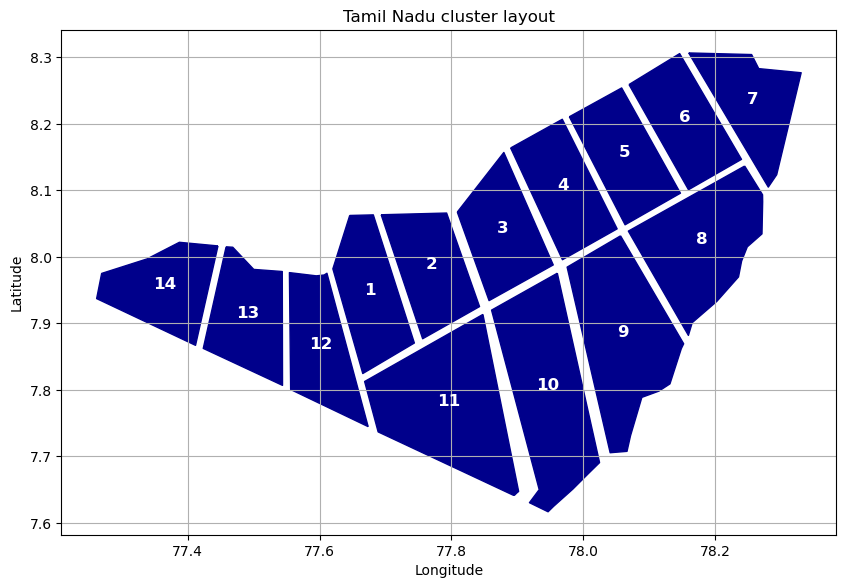

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Path to the shapefile (use the path to your .shp file)
shapefile_path = r"C:\Users\annem\OneDrive - Danmarks Tekniske Universitet\General\Testing_materials\GIS\TN_Offshore_zone.shp"

# Read the shapefile into a GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Check the GeoDataFrame to inspect data and the CRS
print(gdf.head())  # Print the first few rows to inspect the data
print(gdf.crs)     # Print the coordinate reference system

# Plot the wind farms (polygons)
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, color='darkblue', edgecolor='darkblue')

# Add wind farm numbers at the centroid of each polygon
for idx, row in gdf.iterrows():
    # Get the centroid of each wind farm polygon
    centroid = row['geometry'].centroid
    # Place the wind farm number (1 to 14)
    ax.text(centroid.x, centroid.y, str(idx+1), fontsize=12, ha='center', color='white', fontweight='bold')

# Customize the plot
ax.set_title("Tamil Nadu cluster layout")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.grid(True)
plt.show()


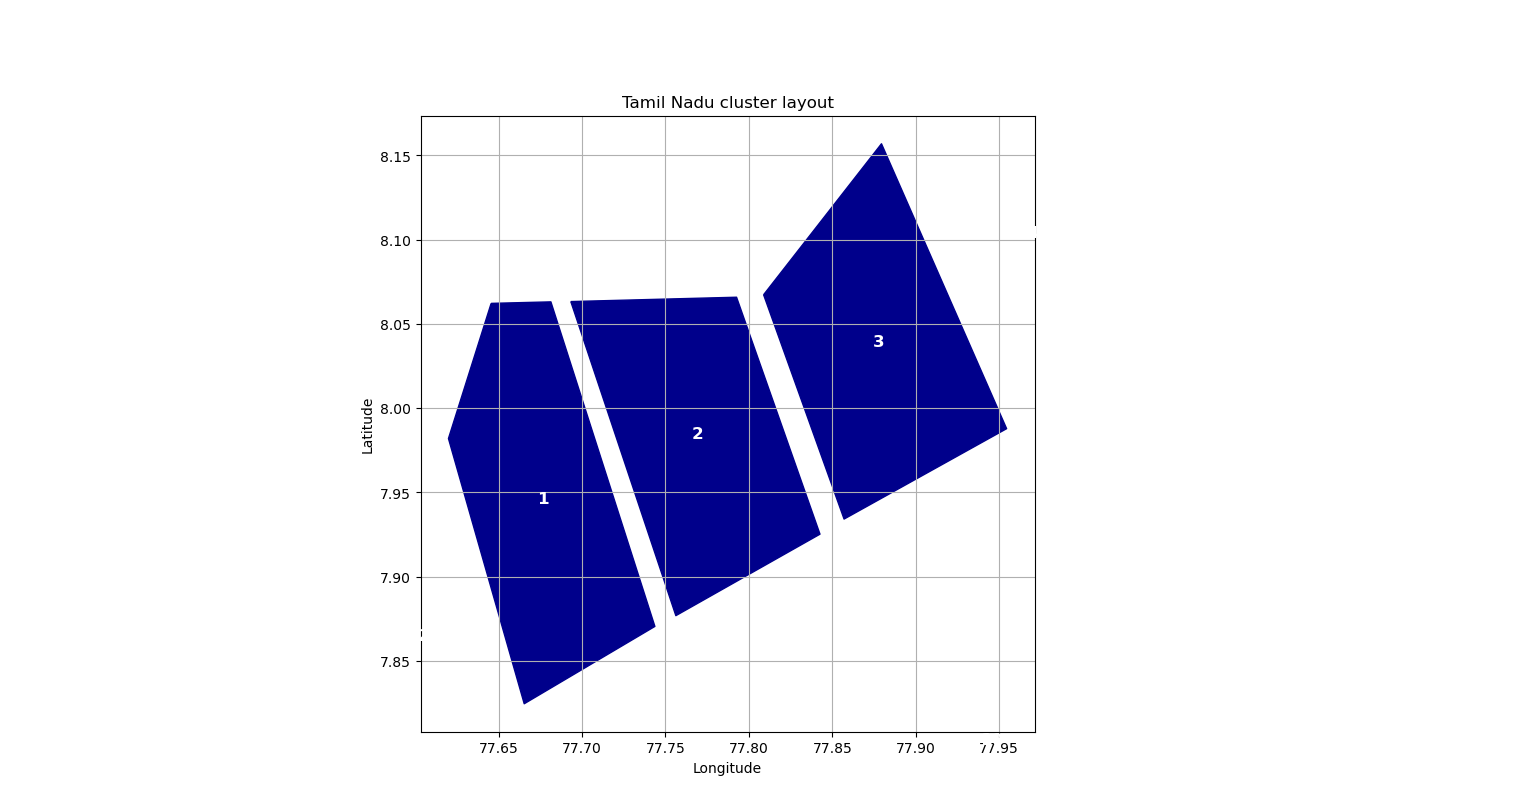

In [6]:
# same plot but only wind farm 1, 2 and 3

fig, ax = plt.subplots(figsize=(10, 8))
gdf.iloc[0:3].plot(ax=ax, color='darkblue', edgecolor='darkblue')
# Add wind farm numbers at the centroid of each polygon
for idx, row in gdf.iterrows():
    # Get the centroid of each wind farm polygon
    centroid = row['geometry'].centroid
    # Place the wind farm number (1 to 14)
    ax.text(centroid.x, centroid.y, str(idx+1), fontsize=12, ha='center', color='white', fontweight='bold')

# Customize the plot
ax.set_title("Tamil Nadu cluster layout")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.grid(True)
plt.show()

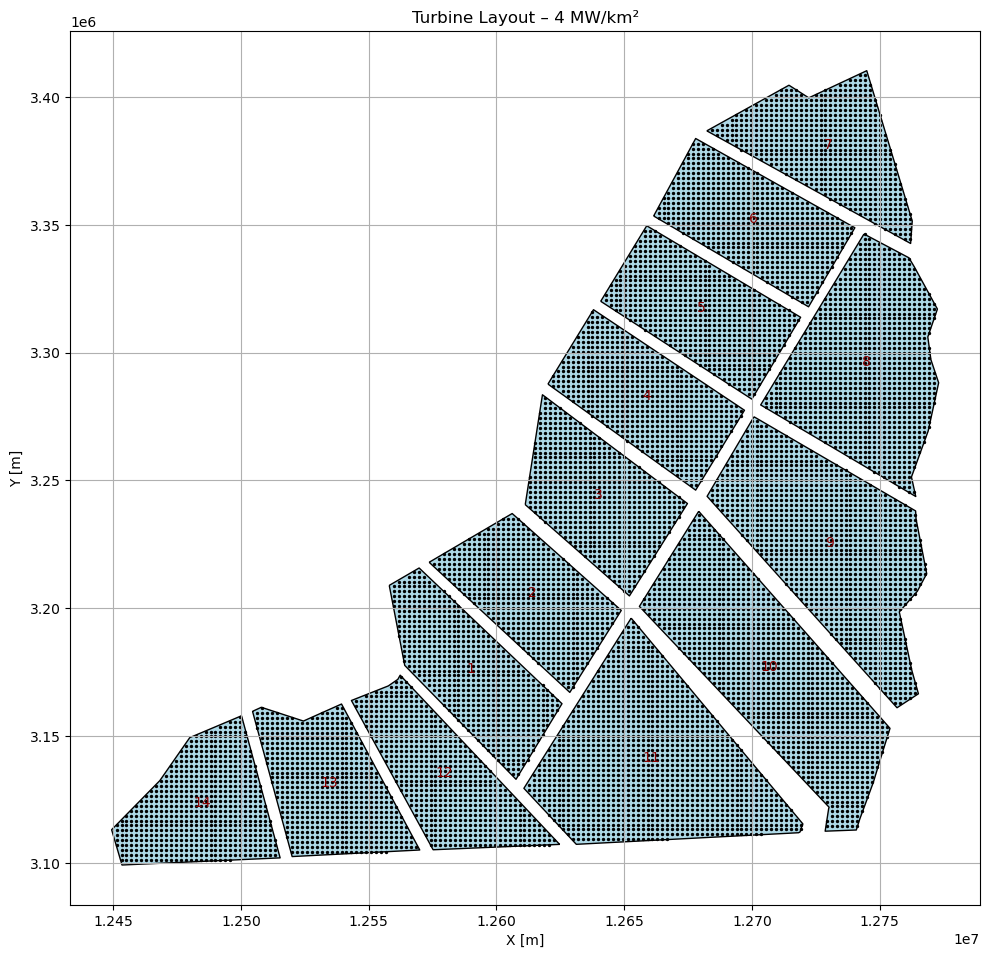

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import numpy as np

# === SETTINGS ===
turbine_spacing = 1936  # meters
density_MW_km2 = 4     # or 8

# Turbine power (MW)
turbine_capacity = 15

# Number of turbines per km²
turbines_per_km2 = density_MW_km2 / turbine_capacity

# === LOAD WIND FARMS ===
shapefile_path = r"C:\Users\annem\OneDrive - Danmarks Tekniske Universitet\General\Testing_materials\GIS\TN_Offshore_zone.shp"
gdf = gpd.read_file(shapefile_path)

# Project to meters if needed (for spatial calculations)
if not gdf.crs or not gdf.crs.to_string().lower().startswith("epsg:326"):
    gdf = gdf.to_crs(epsg=32631)  # UTM zone example, pick one fitting your area

# === PLOT ===
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='lightblue', edgecolor='black')

# Label each polygon with a number
for idx, row in gdf.iterrows():
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, str(idx + 1), fontsize=10, ha='center', color='darkred')

# === PLACE TURBINES ===
all_turbines = []

for _, row in gdf.iterrows():
    poly = row['geometry']
    minx, miny, maxx, maxy = poly.bounds

    # Create grid over the bounding box
    x_coords = np.arange(minx, maxx, turbine_spacing)
    y_coords = np.arange(miny, maxy, turbine_spacing)

    for x in x_coords:
        for y in y_coords:
            p = Point(x, y)
            if poly.contains(p):
                all_turbines.append(p)

# === CREATE GeoDataFrame of turbines ===
turbine_gdf = gpd.GeoDataFrame(geometry=all_turbines, crs=gdf.crs)

# Plot turbines as black dots
turbine_gdf.plot(ax=ax, color='black', markersize=2)

# Final touches
ax.set_title(f"Turbine Layout – {density_MW_km2} MW/km²")
ax.set_xlabel("X [m]")
ax.set_ylabel("Y [m]")
ax.set_aspect('equal')
plt.grid(True)
plt.tight_layout()
plt.show()
